<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/jds.png" style="height: 100px;" align=right> 

# JDS Capstone: Target Market Analysis

You have been provided with information about the customers' historical purchase as the amount of money spent, Number of inactive months and so on. Two columns `Potential_Customer` and `Cust_Last_Purchase` represent the customers' respond to the latest advertisement. The column `Potential_Customer` represents if the customer purchased any product, and the column `Cust_Last_Purchase` represents the amount of this purchase and it is `Nan` if there has been no purchase.

## Data description
- Below is the description of each feature available in the dataset.
<img src="../images/MicrosoftTeams-image.png" style="height: 700px">

## Objective
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`. 

    **Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.

**2. Calculate the value and the revenue of your model.** Fit your model on train set. Assume amonge the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

**3. Compare your best model's revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost
    
**4. Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10\%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    - calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    - calculate the revenue of the default model: send advertisement to everyone
         - cost = advertisement_cost * size of the test set
         - gain = average_purchase * purchase_rate
         - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

## Submission Guideline

Perform the following:

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Wrangling - Cleaning & Merging**: Check and handle the existance of missing values, the type of variables, or integrity of data
    2. **Exploratory Data Analysis**: Analyze data to summarize their main characteristics
    3. **Feature Engineering**: Make new features or change the current features
    4. **Feature Selection**: Choose the best features
    5. **Data Pre-Processing**: Make data usable for applying ML algorithms. 
    6. **Model Design**: Create several predictive models and tune the hyperparameters
    7. **Model Evaluation**: Compare the performance of the models
    8. **Bonus**: Any creative idea for improving machine learning models

The output expected at the end of this capstone is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class. 

**One zip file per group** is to be uploaded on **GDrive** by the **time** that will be given to you by the trainer, including the **jupyter notebook(s)** and the **powerpoint presentation** indicating the **names of all group members**.

## Presentation Guideline

**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

# Table of Content

- [JDS Capstone: Target Market Analysis](#JDS-Capstone:-Target-Market-Analysis)
- [Data description](#Data-description)
- [Objective](#Objective)
- [Submission Guideline](#Submission-Guideline)
- [Presentation Guideline](#Presentation-Guideline)
- [Table of Content](#Table-of-Content)
- [0. Import necessary Packages](#0.-Import-necessary-Packages)
- [1. Load the Data into Pandas Dataframe](#1.-Load-the-Data-into-Pandas-Dataframe)
- [2. Data Cleaning](#2.-Data-Cleaning)
    - [2.1 How big is the dataset? (number of rows, features and total datapoints)](#2.1-How-big-is-the-dataset?-(number-of-rows,-features-and-total-datapoints))
    - [2.2 What is the type of each column?](#2.2-What-is-the-type-of-each-column?)
        - [2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.](#2.2.1-Why-columns-such-as-`Cust_Last_Purchase`-are-`object`-while-they-should-be-`float64`?-Fix-the-type-of-the-columns-as-it-should-be.)
    - [2.3 Check data for duplicate rows and remove the duplicates](#2.3-Check-data-for-duplicate-rows-and-remove-the-duplicates)
    - [2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.](#2.4-Do-we-need-`C_ID`-in-our-analysis?-Drop-the-columns-you-will-not-use-in-your-analysis,-if-there-is-any.)
- [3. Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA))
    - [3.1 Explore Categorical Variables](#3.2-Explore-Categorical-Variables)
        - [3.1.1 Insight](#3.1.1-Insight)
        - [3.1.2 Solution](#3.1.2-Solution)
    - [3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation](#3.2-Explore-Relationship-Between-Categorical-&-Target-Variable.-Interpret-the-observation)
        - [3.2.1. Insight](#3.2.1.-Insight)
    - [3.3 Explore Numerical Variables](#3.3-Explore-Numerical-Variables)
        - [3.3.1 Insight](#3.3.1-Insight)
    - [3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation](#3.4-Explore-the-Relationship-between-Numerical-Variables-&-Target-Variable.-Interpret-your-observation)
    - [3.5 Explore the Relationship between the columns and try to answer the following questions:](#3.5-Explore-the-Relationship-between-the-columns-and-try-to-answer-the-following-questions:)
- [4. Feature Enginearing](#4.-Feature-Enginearing)
    - [4.1 Add Some High Level Features and explore their relationship with the target variable](#4.1-Add-Some-High-Level-Features-and-explore-their-relationship-with-the-target-variable)
    - [4.2 Check Correlation between Numerical Variables](#4.2-Check-Correlation-between-Numerical-Variables)
- [5. Feature Selection](#5.-Feature-Selection)
- [6. Data PreProcessing](#6.-Data-PreProcessing)
    - [6.1 Check the Data for Missing Values](#6.1-Check-the-Data-for-Missing-Values)
    - [6.2 Separate X (features) and y (target)](#6.2-Separate-X-(features)-and-y-(target))
    - [6.3 Split data to train/test](#6.3-Split-data-to-train/test)
    - [6.4 Dummy Variables](#6.4-Dummy-Variables)
    - [6.5 Feature Scaling](#6.5-Feature-Scaling)
    - [6.6 PCA on Numerical Columns only](#6.6-PCA-on-Numerical-Columns-only)
- [7. Objective 1: Machine Learning](#7.-Objective-1:-Machine-Learning)
- [8. Objective 2](#8.-Objective-2)
- [9. Objective 3](#9.-Objective-3)
- [10. Objective 4](#10.-Objective-4)

#   0. Import necessary Packages

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#  1. Load the Data into Pandas Dataframe

In [2]:
url = 'https://raw.githubusercontent.com/hazmohd96/DataStar-Capstone/main/data.csv'

In [3]:
# Load the data into data dataframe

data = pd.read_csv(url)

In [4]:
# View first 5 rows of dataframe
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


In [5]:
# View your data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Potential_Customer,4469.0,0.480868,0.499690,0.0,0.0,0.0,1.0,1.0
C_ID,4469.0,73837.719848,36156.968605,12.0,52713.0,75790.0,93705.0,191672.0
Pur_3_years,4469.0,3.297158,2.207326,0.0,2.0,3.0,4.0,15.0
Pur_5_years,4469.0,11.006042,9.459082,1.0,4.0,9.0,15.0,91.0
Pur_3_years_Indirect,4469.0,1.897516,1.629178,0.0,1.0,2.0,3.0,9.0
Pur_5_years_Indirect,4469.0,5.867756,4.939174,0.0,2.0,4.0,9.0,41.0
InAct_Last,4469.0,17.923697,4.130671,4.0,16.0,18.0,20.0,27.0
InAct_First,4469.0,73.605952,38.094688,15.0,40.0,74.0,111.0,260.0
Ad_Res_1_year,4469.0,13.070038,4.991064,3.0,11.0,12.0,13.0,49.0
Ad_Res_3_Year,4469.0,29.631237,7.787209,5.0,26.0,31.0,34.0,71.0


# 2. Data Cleaning
Checking the existance of missing values, the type of variables, or integrity of data. 

## 2.1 How big is the dataset? (number of rows, features and total datapoints)

In [6]:
data.shape

(4469, 25)

In [7]:
# Show number of rows, features and total datapoints
print("Dataset has {} number of rows".format(len(data)))
print("Dataset has {} number of features".format(len(data.columns)))

datapoint = data.shape[0] * data.shape[1]
print("Dataset has {} number of total datapoints".format(datapoint))

Dataset has 4469 number of rows
Dataset has 25 number of features
Dataset has 111725 number of total datapoints


## 2.2 What is the type of each column?

In [8]:
#Show type of columns
data.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                   object
Pur_3_years_Avg              object
Pur_5_years_Avg              object
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income              object
dtype: object

### 2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.

**Attention:** Some numerical columns have missing values, Dollar sign, or Comma. You need to fix the issue to be able to convert the column to numerical. 

**Hint:** 
1. The following code can help you to remove an 'OldSign' and replace it with a 'NewSign' or nothing: `df.col=df.col.str.replace('OldSign', 'NewSign')`

2. After removing the signs and replace it with correct sign, or nothing you need to:

    a- Create a list of the name of the categorical columns and the numerical columns:
        `CatCols=[Name of the Categorical columns]`
        `NumCols=list(set(data.columns)-set(CatCols))`
    
    b- Fix the type of the columns
        `data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))`
        `data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))`

In [9]:
#Check columns with $ and , signs
data.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,...,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,...,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,...,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,...,71,8,8,33,A,0,73.0,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,...,63,6,12,24,S,1,68.0,F,H,"$113,663.00"


In [10]:
#Remove and replace $ and , signs
new_Col_Type = ['Cust_Last_Purchase','Pur_latest','Pur_3_years_Avg','Pur_5_years_Avg','Pur_3_years_Avg_Indirect'
             ,'Pur_3_years_Avg_Indirect','Cust_Ann_Income']

for i in new_Col_Type:
    data[i] = data[i].str.replace('$', '')

for i in new_Col_Type:
    data[i] = data[i].str.replace(',', '')   

In [11]:
#Show columns that $ and , sign has been removed
for i in data:
    if i in new_Col_Type:
        print(data[i].unique())
        print('-----------------------------------------------------------------------------')
    

['5.00 ' '30.00 ' nan '20.00 ' '10.00 ' '13.00 ' '25.00 ' '26.00 '
 '14.00 ' '15.00 ' '12.00 ' '4.00 ' '40.00 ' '11.00 ' '8.00 ' '6.00 '
 '2.00 ' '3.00 ' '21.00 ' '23.00 ' '16.00 ' '24.00 ' '17.00 ' '7.00 '
 '50.00 ' '100.00 ' '36.00 ' '51.00 ' '48.00 ' '32.00 ' '18.00 ' '9.00 '
 '22.00 ' '28.00 ' '1.00 ' '38.00 ' '75.00 ' '35.00 ' '60.00 ' '45.00 '
 '27.00 ' '200.00 ' '18.25 ' '29.00 ' '19.00 ' '34.00 ' '46.00 ' '37.00 '
 '47.00 ' '44.00 ' '42.00 ']
-----------------------------------------------------------------------------
['0.00 ' '25.00 ' '15.00 ' '20.00 ' '3.00 ' '10.00 ' '18.00 ' '5.00 '
 '16.00 ' '12.00 ' '35.00 ' '14.00 ' '17.00 ' '30.00 ' '21.00 ' '52.00 '
 '7.00 ' '50.00 ' '27.00 ' '8.00 ' '6.00 ' '23.00 ' '9.00 ' '28.00 '
 '4.00 ' '11.00 ' '46.00 ' '100.00 ' '26.00 ' '32.00 ' '40.00 ' '13.00 '
 '38.00 ' '36.00 ' '22.00 ' '19.00 ' '150.00 ' '29.00 ' '33.00 ' '31.00 '
 '44.00 ' '2.50 ' '60.00 ' '2.00 ' '24.00 ' '6.25 ' '55.00 ' '53.00 '
 '1.00 ' '250.00 ' '34.00 ' '200.00 ' 

No more '$' signs or ',' in the dataset

In [12]:
#Create a list of the name of the categorical columns and the numerical columns
CatCols=['Potential_Customer', 'C_ID', 'Status_Cust', 'Status_Latest_Ad','Gender', 'Cust_Prop' ]
NumCols=list(set(data.columns)-set(CatCols))

#Fix the type of the columns
data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

In [13]:
data.dtypes

Potential_Customer          category
C_ID                        category
Cust_Last_Purchase           float64
Pur_3_years                  float64
Pur_5_years                  float64
Pur_3_years_Indirect         float64
Pur_5_years_Indirect         float64
Pur_latest                   float64
Pur_3_years_Avg              float64
Pur_5_years_Avg              float64
Pur_3_years_Avg_Indirect     float64
InAct_Last                   float64
InAct_First                  float64
Ad_Res_1_year                float64
Ad_Res_3_Year                float64
Ad_Res_5_Year                float64
Ad_Res_Ind_1_Year            float64
Ad_Res_Ind_3_Year            float64
Ad_Res_Ind_5_Year            float64
Status_Cust                 category
Status_Latest_Ad            category
Age                          float64
Gender                      category
Cust_Prop                   category
Cust_Ann_Income              float64
dtype: object

## 2.3 Check data for duplicate rows and remove the duplicates

**Hint:**

1. `data.duplicated()` will give you `True` if the row in `data` is duplicate and `False` otherwise.

2. `duplicates.sum()` will tell you how many duplicates you have in `data`.

3. `data=data.drop_duplicates()` will remove the duplicates

In [14]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4464     True
4465     True
4466     True
4467     True
4468     True
Length: 4469, dtype: bool

In [15]:
#Total of duplicate data
data.duplicated().sum()

851

In [16]:
#Remove duplicate data
data = data.drop_duplicates()

In [17]:
#Check again total of duplicate data after removal
data.duplicated().sum()

0

## 2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.

**Hint:** 
1. Drop the useless column(s)
2. Remove the name of the column(s) from `CatCols` or `NumCols`
    Example: CatCols.remove('C_ID')

In [18]:
CatCols.remove('C_ID')

In [19]:
CatCols

['Potential_Customer',
 'Status_Cust',
 'Status_Latest_Ad',
 'Gender',
 'Cust_Prop']

In [20]:
NumCols.remove('Cust_Last_Purchase')

In [21]:
NumCols

['Pur_3_years_Avg_Indirect',
 'Pur_3_years',
 'InAct_First',
 'Pur_5_years_Indirect',
 'Pur_latest',
 'Pur_3_years_Indirect',
 'Ad_Res_1_year',
 'Age',
 'Ad_Res_3_Year',
 'InAct_Last',
 'Pur_5_years',
 'Ad_Res_5_Year',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_Ind_1_Year',
 'Pur_3_years_Avg',
 'Pur_5_years_Avg',
 'Ad_Res_Ind_3_Year',
 'Cust_Ann_Income']

# 3. Exploratory Data Analysis (EDA)
    
Checking the relationship betweem variables, summary of data, outliers, filling missing values etc.
**If the ultimate goal is designing predictive models on the data, and we use EDA as part of the proprocessing, we are NOT allowed to do EDA on the test set.** However, if you only do EDA to get business insight from the data, you **CAN** use the whole data, if you don't use that insight for data preprocessing such as data cleaning.
    
**Example:** To impute the missing values by mean/median, we calculate the mean or the median on the Train set only and then we impute the missing values by that mean/median on both Train and Test data.

## 3.3 Explore Categorical Variables
1. How many categories in each categorical variables?
2. What proportion/percentage from each category?

**Hint:**
For visualization you can use `sns.countplot()` for each categorical variable


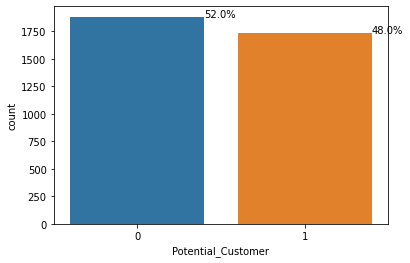

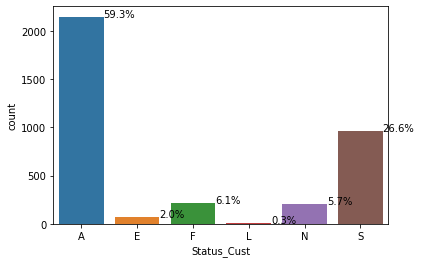

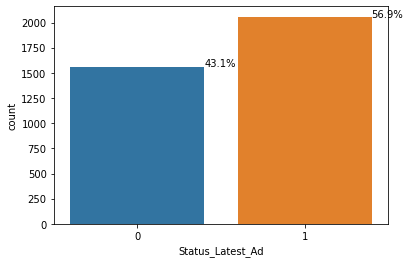

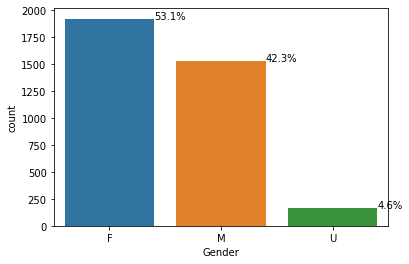

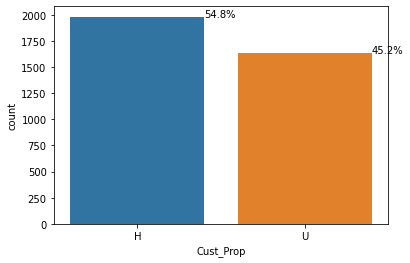

In [22]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
    plt.show()

for i,x in enumerate(CatCols):
    plt.figure(i)
    ax =sns.countplot(x=x, data=data)
    without_hue(ax, data)

Age_group
(-1, 0]        1
(0, 12]       18
(12, 20]      24
(20, 40]     386
(40, 60]     998
(60, 90]    1398
Name: Age, dtype: int64

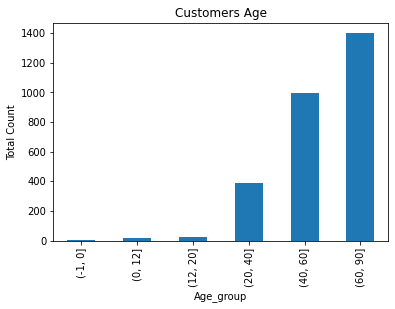

In [23]:
data['Age_group'] = pd.cut(data.Age, bins=[-1,0,12, 20, 40, 60, 90])
dfg = data.groupby(['Age_group'])['Age'].count()

dfg.plot(kind='bar', title='Customers Age', ylabel='Total Count')
data.groupby(['Age_group'])['Age'].count()

### 3.1.1 Insight

Insight

Potential Customer\
There are 48% customers identified as potential buyer based on the features.

Customer Status\
Highest percentage of customer status is 59.3% which are active meanwhile lowest percentage of customer status are 0.3% which are lapsed buyer and 2.0% are inactive buyers.

Status Advertisement\
Most of the customers purchase product in response to last promotional sales which made up the 56.9% of the total customers.

Gender\
This plot shows the distribution of customer gender.The highest gender are female which is about 53.1% and the lowest percentage is 4.6%  which is unknown gender.

Customer Property\
54.8% of the customers owned a property while 45.2% of the customer identified as unknown. Based on the plot, assumption can be made that most the customers had a residential address.

Age Customer \
Age It seems like majority of the customer are from older ages ranging from age 40-90 years old



### 3.1.2 Solution

## 3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation

**Hint**: 
1. Create list of the categorical features:
    `CatFes=list(set(CatCols)-set(['Potential_Customer']))`

2. use `sns.countplot()` to create subplots for each categorical feature and hue=`data.Potential_Customer` to assign color to the plot based on the target variable `Potential_Customer`

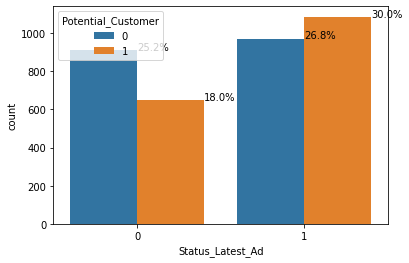

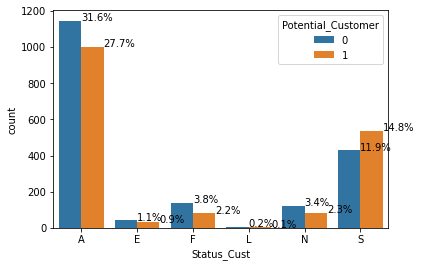

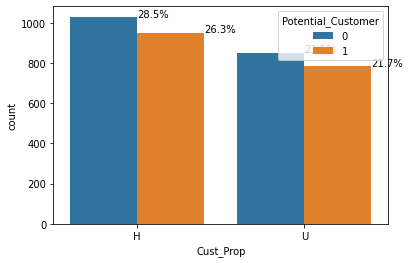

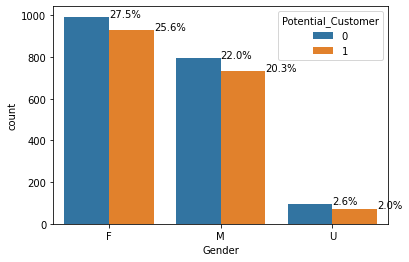

In [24]:
CatFes=list(set(CatCols)-set(['Potential_Customer']))

def plot_graph(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
    plt.show()

for i,x in enumerate(CatFes):
    plt.figure(i)
    ax =sns.countplot(x=x, data=data,hue=data.Potential_Customer)
    plot_graph(ax, data)

### 3.2.1. Insight

In [25]:
print("Insight\n")

print("Status Advertisement")
print("30% 0f the customer who respond to the last promotional sales and 18% who did not respond to last promotional sales are potential customers.\n")

print("Gender")
print("Based on the plot, non potential customer were higher for both gender with 27.5% and 22% for female and male respectively.\n")

print("Customer Property")
print("28.5% of the customer that are house owner were identified as non potential customer meanwhile 23.5% of the customer that are unknown are identified as non-potential customer\n")

print("Status Customers")
print("Based on the plot, active buyers were the highest for both potential and non-potential customers with 31.6% and 27.7% respectively. Lapsed buyer is the least for both potential and non-potential customers with 0.2% and 0.1% respectively.\n")

Insight

Status Advertisement
30% 0f the customer who respond to the last promotional sales and 18% who did not respond to last promotional sales are potential customers.

Gender
Based on the plot, non potential customer were higher for both gender with 27.5% and 22% for female and male respectively.

Customer Property
28.5% of the customer that are house owner were identified as non potential customer meanwhile 23.5% of the customer that are unknown are identified as non-potential customer

Status Customers
Based on the plot, active buyers were the highest for both potential and non-potential customers with 31.6% and 27.7% respectively. Lapsed buyer is the least for both potential and non-potential customers with 0.2% and 0.1% respectively.



## 3.3 Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

### 3.3.1 Insight

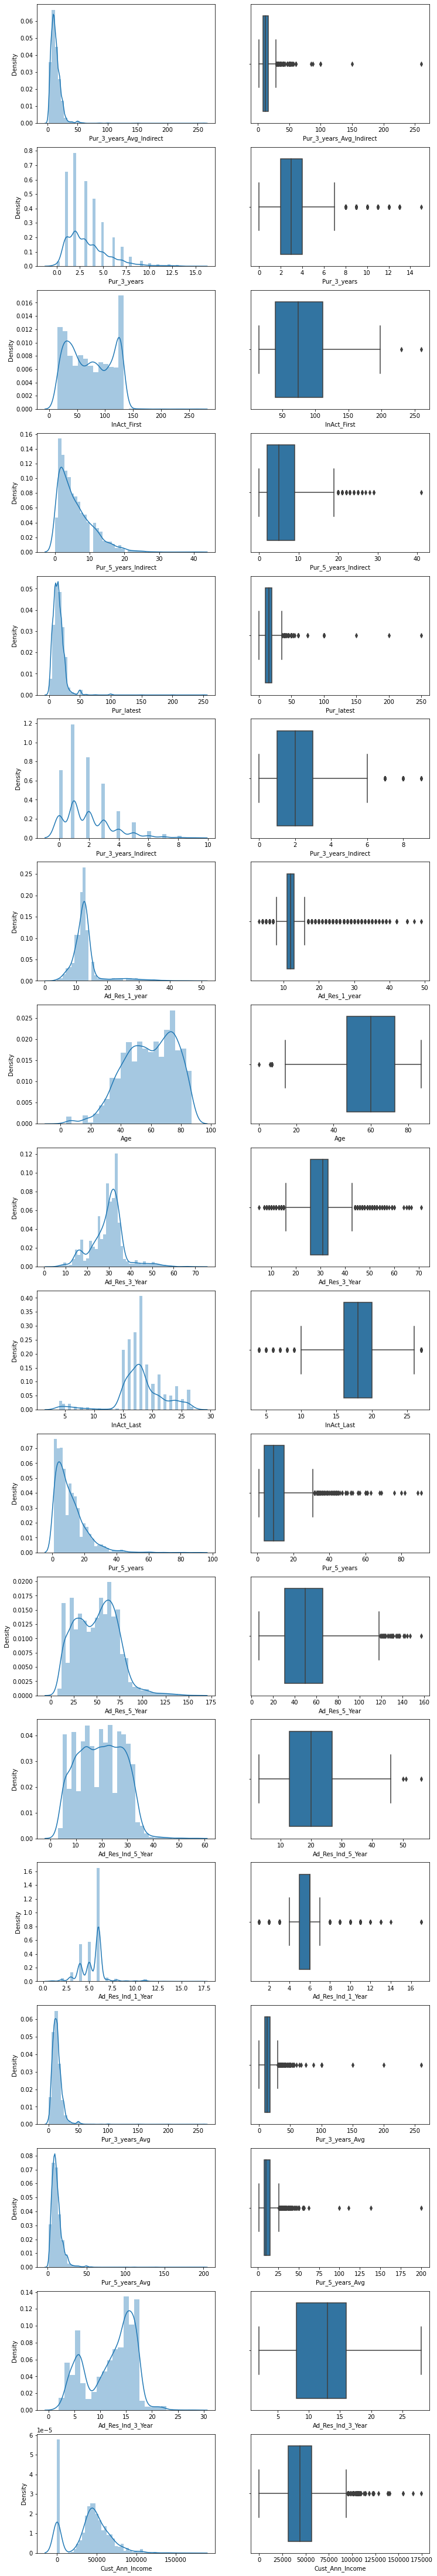

In [26]:
fig,ax = plt.subplots(ncols=2, nrows=len(NumCols),figsize=(12,80))

for i in range(len(NumCols)): 
    sns.distplot(data[NumCols[i]],ax=ax[i,0])
    sns.boxplot(data[NumCols[i]],ax=ax[i,1])


## 3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation

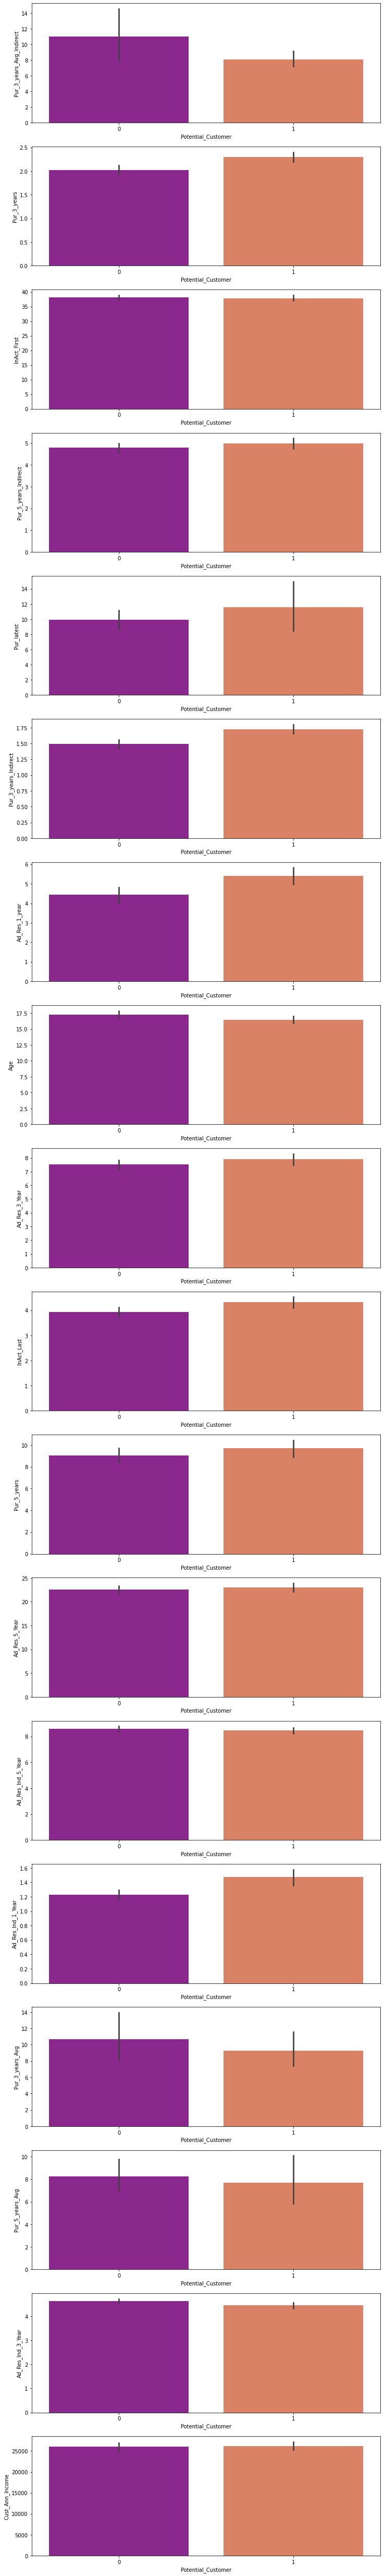

In [27]:
#Your Code Here
fig,ax = plt.subplots(nrows=len(NumCols),figsize=(12,90))

for i in range(len(NumCols)):
      sns.barplot(x=data.Potential_Customer, y = data[NumCols[i]], palette ='plasma', estimator = np.std, ax=ax[i])

In [28]:
print("Insight\n")

print("In the last 3 years, active Potential_Customers (1) made more purchase compared to the non-active Potential_Customers (0).")
print("Active purchasing is due to Potential_Customers has higher annual salary income.")

Insight

In the last 3 years, active Potential_Customers (1) made more purchase compared to the non-active Potential_Customers (0).
Active purchasing is due to Potential_Customers has higher annual salary income.


## 3.5 Explore the Relationship between the columns and try to answer the following questions:

1. Is there any significant difference between men/women's salary?

2. Is there any significant difference between men/women's number of the purchase in the last three years?

3. Is there any significant difference between men/women's average purchase in the last three years?

4. Is there any significant difference between men/women's total purchase in the last three years?

5. (optional) You can explore more about the relationships between the columns, if you believe the insight will improve some dicisions in this company. For instance, sending advertisements to customers regarding gender, customer status, etc.

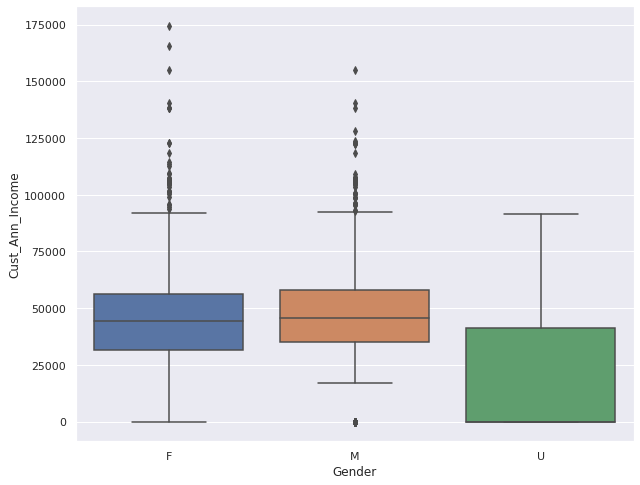

In [29]:
# Is there any significant difference between men/women's salary?
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x=data['Gender'],y=data['Cust_Ann_Income'])

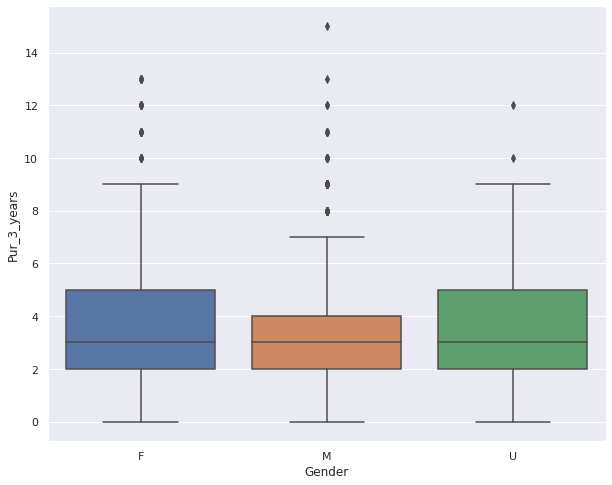

In [30]:
#Is there any significant difference between men/women's number of the purchase in the last three years?
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x=data['Gender'],y=data['Pur_3_years'])


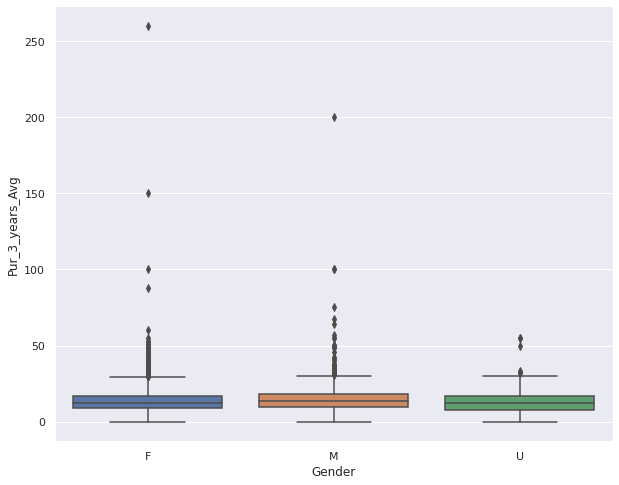

In [31]:
# Is there any significant difference between men/women's average purchase in the last three years?
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x=data['Gender'],y=data['Pur_3_years_Avg'])


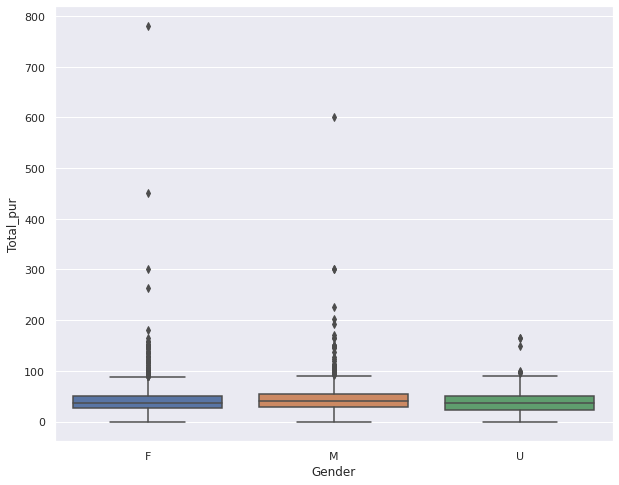

In [32]:
# Is there any significant difference between men/women's total purchase in the last three years?
data['Total_pur']=data['Pur_3_years_Avg']*3
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x=data['Gender'],y=data['Total_pur'])


# 4. Feature Enginearing

## 4.1 Add Some High Level Features and explore their relationship with the target variable

Sometimes we can use high level features that reflect the interactions between the columns as new features to get better insight and feed more information to our predictive models. Also transformation of some columns can be better options to be fed to the models. For instance, instead of a numerical column, you can use log of the column, square of the column, or any other transformation of the column. The type of interaction, or transformation you should choose, can be defined after Exploratory data analysis or just business insight.

**Example:** Instead of two variables for the number of purchase, and the average amount of purchase, we could calculate the total amount of purchase for the customers. 

In [33]:
# Feature engineering: calculate the total amount of purchase for the customers, 
# Instead of two variables for the number of purchase, and the average amount of purchase.

data['Total_Pur_3_years'] = data['Pur_3_years'] * data['Pur_3_years_Avg']
data['Total_Pur_5_years'] = data['Pur_5_years'] * data['Pur_5_years_Avg']

In [34]:
newNumCols = []

for col in NumCols:
    newNumCols.append(col)

In [35]:
newNumCols.append('Total_Pur_3_years')

In [36]:
newNumCols.append('Total_Pur_5_years')

In [37]:
newNumCols

['Pur_3_years_Avg_Indirect',
 'Pur_3_years',
 'InAct_First',
 'Pur_5_years_Indirect',
 'Pur_latest',
 'Pur_3_years_Indirect',
 'Ad_Res_1_year',
 'Age',
 'Ad_Res_3_Year',
 'InAct_Last',
 'Pur_5_years',
 'Ad_Res_5_Year',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_Ind_1_Year',
 'Pur_3_years_Avg',
 'Pur_5_years_Avg',
 'Ad_Res_Ind_3_Year',
 'Cust_Ann_Income',
 'Total_Pur_3_years',
 'Total_Pur_5_years']

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        3618 non-null   category
 1   C_ID                      3618 non-null   category
 2   Cust_Last_Purchase        1736 non-null   float64 
 3   Pur_3_years               3618 non-null   float64 
 4   Pur_5_years               3618 non-null   float64 
 5   Pur_3_years_Indirect      3618 non-null   float64 
 6   Pur_5_years_Indirect      3618 non-null   float64 
 7   Pur_latest                3618 non-null   float64 
 8   Pur_3_years_Avg           3618 non-null   float64 
 9   Pur_5_years_Avg           3618 non-null   float64 
 10  Pur_3_years_Avg_Indirect  2956 non-null   float64 
 11  InAct_Last                3618 non-null   float64 
 12  InAct_First               3618 non-null   float64 
 13  Ad_Res_1_year             3618 non-null   float6

In [39]:
data.isna().sum()

Potential_Customer             0
C_ID                           0
Cust_Last_Purchase          1882
Pur_3_years                    0
Pur_5_years                    0
Pur_3_years_Indirect           0
Pur_5_years_Indirect           0
Pur_latest                     0
Pur_3_years_Avg                0
Pur_5_years_Avg                0
Pur_3_years_Avg_Indirect     662
InAct_Last                     0
InAct_First                    0
Ad_Res_1_year                  0
Ad_Res_3_Year                  0
Ad_Res_5_Year                  0
Ad_Res_Ind_1_Year              0
Ad_Res_Ind_3_Year              0
Ad_Res_Ind_5_Year              0
Status_Cust                    0
Status_Latest_Ad               0
Age                          793
Gender                         0
Cust_Prop                      0
Cust_Ann_Income                0
Age_group                    793
Total_pur                      0
Total_Pur_3_years              0
Total_Pur_5_years              0
dtype: int64

## 4.2 Check Correlation between Numerical Variables

In [40]:
data.corr()

,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,...,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Age,Cust_Ann_Income,Total_pur,Total_Pur_3_years,Total_Pur_5_years
Cust_Last_Purchase,1.000000,-0.322553,-0.211361,-0.273108,-0.236708,0.776690,0.724706,0.620225,0.739081,0.107874,...,0.007594,-0.077098,-0.001391,-0.137434,-0.112825,-0.073865,0.061243,0.724706,0.397006,0.200823
Pur_3_years,-0.322553,1.000000,0.557350,0.842210,0.540581,-0.349252,-0.355583,-0.369803,-0.376704,-0.237964,...,0.384991,0.301513,0.344823,0.593459,0.330041,0.064089,-0.074388,-0.355583,0.457645,0.228605
Pur_5_years,-0.211361,0.557350,1.000000,0.478441,0.905120,-0.260562,-0.248276,-0.339597,-0.240580,-0.241410,...,0.466951,0.790215,0.240929,0.427481,0.756462,0.186004,-0.043361,-0.248276,0.233052,0.668089
Pur_3_years_Indirect,-0.273108,0.842210,0.478441,1.000000,0.566286,-0.296213,-0.293545,-0.292267,-0.300027,-0.168513,...,0.275014,0.231537,0.274756,0.639989,0.252604,0.045681,-0.044092,-0.293545,0.386660,0.198298
Pur_5_years_Indirect,-0.236708,0.540581,0.905120,0.566286,1.000000,-0.266606,-0.257339,-0.361608,-0.245621,-0.157472,...,0.368464,0.750877,0.179324,0.457074,0.779955,0.177435,-0.041983,-0.257339,0.204251,0.541204
Pur_latest,0.776690,-0.349252,-0.260562,-0.296213,-0.266606,1.000000,0.786184,0.747429,0.742934,0.132908,...,-0.022255,-0.106823,0.001693,-0.133058,-0.121806,-0.055970,0.071228,0.786184,0.408983,0.187151
Pur_3_years_Avg,0.724706,-0.355583,-0.248276,-0.293545,-0.257339,0.786184,1.000000,0.881783,0.976536,0.091458,...,0.032629,-0.072774,0.019759,-0.115329,-0.096414,-0.060070,0.055722,1.000000,0.501033,0.246633
Pur_5_years_Avg,0.620225,-0.369803,-0.339597,-0.292267,-0.361608,0.747429,0.881783,1.000000,0.878690,0.082255,...,-0.090136,-0.215725,-0.018264,-0.179683,-0.261724,-0.094175,0.062140,0.881783,0.394574,0.189582
Pur_3_years_Avg_Indirect,0.739081,-0.376704,-0.240580,-0.300027,-0.245621,0.742934,0.976536,0.878690,1.000000,0.087836,...,0.011648,-0.070572,0.010423,-0.053453,-0.100258,-0.050661,0.059273,0.976536,0.523472,0.262349
InAct_Last,0.107874,-0.237964,-0.241410,-0.168513,-0.157472,0.132908,0.091458,0.082255,0.087836,1.000000,...,-0.350155,-0.239222,-0.356574,-0.175138,-0.138193,-0.099950,0.032755,0.091458,-0.121982,-0.182046


In [41]:
print("Correlation between Pur_3_years_Indirect and Pur_5_years_Indirect is 0.56 which is moderately positive correlated because customers prefer to shop through external links from other websites.")

Correlation between Pur_3_years_Indirect and Pur_5_years_Indirect is 0.56 which is moderately positive correlated because customers prefer to shop through external links from other websites.


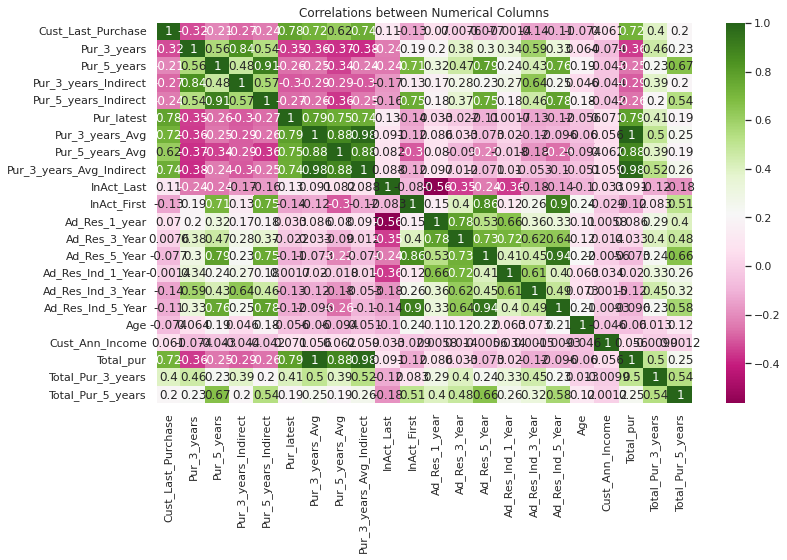

In [42]:
#Create a Heatmap of correlation between the numerical variables

corr_matrix = data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, square=False)
plt.title('Correlations between Numerical Columns');

In [43]:
print("Correlation between InAct_Last and Ad_Res_1_year is -0.56 which is moderately negative correlated because the longer the customer is inactive, the response received by business decreased.")

Correlation between InAct_Last and Ad_Res_1_year is -0.56 which is moderately negative correlated because the longer the customer is inactive, the response received by business decreased.


# 5. Feature Selection

It is better we do not have numerical columns with high correlations as they confuse the machine learning algorithms. We can manually remove the highly-correlated features, or we can let the PCA handles that during the pre-processing.

# 6. Data PreProcessing

## 6.1 Check the Data for Missing Values
**Hint:**
1. Check which columns have missing values

2. Create a list of the name of the columns that have missing values
    `null_columns=data.columns[data.isnull().any()]`
   
3. Decide how you should handle the missing values for each column:

    a. For some numerical columns missing value simply means 0.
    
    b. We can fill missing values in a numerical column by replacing mean of the column, if the column is not skewed. If the column is skewed, median might be a better option.
    
 **Attention:** If you decide to impute the missing values with mean/median, you need to calculate mean/median in the train set and then fill the missing values on both train and test with them. The similar rule applies for handling outliers IF you decide to replace outliers with lower/upper fence. You can calculate the UF/LF on the train set only. For this capstone, it is totally up to you to decide replacing the outliers or just using an appropriate scaling technique.

In [44]:
#Check data for missing values
null_columns = data.columns[data.isnull().any()]
null_columns

Index(['Cust_Last_Purchase', 'Pur_3_years_Avg_Indirect', 'Age', 'Age_group'], dtype='object')

## 6.1 Separate X (features) and y (target)

**Attention:** Don't forget to exclude the column `Cust_Last_Purchase` from your analysis
Define X and y and split the data into 75/25 train/test set. Use random_state=42 and stratify=y

In [45]:
y = data['Potential_Customer']
X = data.drop(['C_ID','Potential_Customer','Cust_Last_Purchase','Age_group'], axis=1)

## 3.2 Split data to train/test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42, stratify=y)

## 3.3 Find and Remove/Impute the Missing Values

In [47]:
# Return the number of missing values in each column
X_train.isna().sum()

Pur_3_years                   0
Pur_5_years                   0
Pur_3_years_Indirect          0
Pur_5_years_Indirect          0
Pur_latest                    0
Pur_3_years_Avg               0
Pur_5_years_Avg               0
Pur_3_years_Avg_Indirect    520
InAct_Last                    0
InAct_First                   0
Ad_Res_1_year                 0
Ad_Res_3_Year                 0
Ad_Res_5_Year                 0
Ad_Res_Ind_1_Year             0
Ad_Res_Ind_3_Year             0
Ad_Res_Ind_5_Year             0
Status_Cust                   0
Status_Latest_Ad              0
Age                         585
Gender                        0
Cust_Prop                     0
Cust_Ann_Income               0
Total_pur                     0
Total_Pur_3_years             0
Total_Pur_5_years             0
dtype: int64

In [48]:
X_test.isna().sum()

Pur_3_years                   0
Pur_5_years                   0
Pur_3_years_Indirect          0
Pur_5_years_Indirect          0
Pur_latest                    0
Pur_3_years_Avg               0
Pur_5_years_Avg               0
Pur_3_years_Avg_Indirect    142
InAct_Last                    0
InAct_First                   0
Ad_Res_1_year                 0
Ad_Res_3_Year                 0
Ad_Res_5_Year                 0
Ad_Res_Ind_1_Year             0
Ad_Res_Ind_3_Year             0
Ad_Res_Ind_5_Year             0
Status_Cust                   0
Status_Latest_Ad              0
Age                         208
Gender                        0
Cust_Prop                     0
Cust_Ann_Income               0
Total_pur                     0
Total_Pur_3_years             0
Total_Pur_5_years             0
dtype: int64

In [49]:
# To impute the missing values by median, we calculate the median on the Train set only
# Then we impute the missing values by that median on both Train and Test data
# Replacing numerical NaN value with median

X_train['Pur_3_years_Avg_Indirect'] = X_train['Pur_3_years_Avg_Indirect'].fillna(X_train['Pur_3_years_Avg_Indirect'].median())
    
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())


In [50]:
X_test['Pur_3_years_Avg_Indirect'] = X_test['Pur_3_years_Avg_Indirect'].fillna(X_train['Pur_3_years_Avg_Indirect'].median())
X_test['Age'] = X_test['Age'].fillna(X_train['Age'].median())

In [51]:
# Check again the number of missing values in each column
X_train.isna().sum()

Pur_3_years                 0
Pur_5_years                 0
Pur_3_years_Indirect        0
Pur_5_years_Indirect        0
Pur_latest                  0
Pur_3_years_Avg             0
Pur_5_years_Avg             0
Pur_3_years_Avg_Indirect    0
InAct_Last                  0
InAct_First                 0
Ad_Res_1_year               0
Ad_Res_3_Year               0
Ad_Res_5_Year               0
Ad_Res_Ind_1_Year           0
Ad_Res_Ind_3_Year           0
Ad_Res_Ind_5_Year           0
Status_Cust                 0
Status_Latest_Ad            0
Age                         0
Gender                      0
Cust_Prop                   0
Cust_Ann_Income             0
Total_pur                   0
Total_Pur_3_years           0
Total_Pur_5_years           0
dtype: int64

In [52]:
X_test.isna().sum()

Pur_3_years                 0
Pur_5_years                 0
Pur_3_years_Indirect        0
Pur_5_years_Indirect        0
Pur_latest                  0
Pur_3_years_Avg             0
Pur_5_years_Avg             0
Pur_3_years_Avg_Indirect    0
InAct_Last                  0
InAct_First                 0
Ad_Res_1_year               0
Ad_Res_3_Year               0
Ad_Res_5_Year               0
Ad_Res_Ind_1_Year           0
Ad_Res_Ind_3_Year           0
Ad_Res_Ind_5_Year           0
Status_Cust                 0
Status_Latest_Ad            0
Age                         0
Gender                      0
Cust_Prop                   0
Cust_Ann_Income             0
Total_pur                   0
Total_Pur_3_years           0
Total_Pur_5_years           0
dtype: int64

## 6.4 Dummy Variables
Change categorical variables with numerical variabels

In [53]:
X_train_dum = pd.get_dummies(X_train, drop_first=True)
X_train_dum

,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,...,Total_Pur_5_years,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Gender_U,Cust_Prop_U
3151,4.0,29.0,2.0,9.0,6.0,7.50,5.45,7.00,4.0,75.0,...,158.05,0,0,0,0,1,1,0,0,1
1698,5.0,22.0,4.0,13.0,8.0,8.60,6.82,8.50,9.0,91.0,...,150.04,0,0,0,0,1,1,0,0,0
2327,5.0,8.0,2.0,3.0,10.0,9.60,8.00,10.50,17.0,44.0,...,64.00,0,0,0,0,0,0,1,0,0
721,6.0,7.0,3.0,3.0,5.0,2.67,2.57,3.00,17.0,30.0,...,17.99,0,0,0,0,0,1,0,0,0
811,3.0,15.0,2.0,9.0,10.0,11.33,9.60,12.00,18.0,130.0,...,144.00,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,7.0,45.0,6.0,27.0,15.0,14.14,9.80,13.17,16.0,125.0,...,441.00,0,0,0,0,1,1,0,0,1
2424,2.0,4.0,1.0,2.0,15.0,12.00,9.00,15.00,17.0,53.0,...,36.00,0,0,0,0,0,0,0,1,1
2788,3.0,21.0,0.0,11.0,11.0,10.33,5.38,11.88,16.0,125.0,...,112.98,0,0,0,0,1,1,1,0,0
1813,4.0,8.0,2.0,2.0,15.0,12.25,12.38,13.50,22.0,52.0,...,99.04,0,0,0,0,0,0,0,0,0


In [54]:
X_test_dum = pd.get_dummies(X_test, drop_first=True)
X_test_dum

,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,...,Total_Pur_5_years,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Gender_U,Cust_Prop_U
1024,6.0,12.0,3.0,6.0,11.0,9.67,7.17,11.00,16.0,115.0,...,86.04,0,0,0,0,0,1,0,1,1
3531,4.0,8.0,2.0,4.0,15.0,11.25,8.63,10.00,18.0,56.0,...,69.04,0,0,0,0,1,1,0,0,1
1992,7.0,9.0,4.0,5.0,10.0,8.43,7.89,8.75,17.0,41.0,...,71.01,0,0,0,0,1,1,0,0,0
1875,2.0,6.0,2.0,4.0,21.0,18.00,12.00,18.00,16.0,68.0,...,72.00,0,0,0,0,0,0,1,0,0
243,6.0,7.0,4.0,5.0,20.0,17.50,16.43,20.00,16.0,41.0,...,115.01,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,5.0,5.0,2.0,2.0,10.0,8.20,8.20,9.50,18.0,31.0,...,41.00,0,0,0,0,0,0,0,0,0
3413,1.0,1.0,1.0,1.0,25.0,25.00,25.00,25.00,24.0,24.0,...,25.00,0,0,0,1,0,0,0,0,0
1407,4.0,13.0,2.0,8.0,10.0,8.75,9.15,10.00,16.0,98.0,...,118.95,0,0,0,0,0,1,0,0,1
3336,5.0,9.0,3.0,5.0,12.0,11.40,9.00,10.67,17.0,53.0,...,81.00,0,0,0,0,0,0,1,0,0


In [55]:
X_train_dum.shape

(2713, 30)

In [56]:
X_test_dum.shape

(905, 30)

In [57]:
y_train.shape

(2713,)

In [58]:
y_test.shape

(905,)

In [59]:
X_train_dum_num=X_train_dum[newNumCols]
X_test_dum_num=X_test_dum[newNumCols]

In [60]:
X_train_dum_num.shape

(2713, 20)

In [61]:
X_test_dum_num.shape

(905, 20)

In [62]:
newCatCols = [x for x in X_train_dum.columns if x not in newNumCols]

In [63]:
newCatCols

['Total_pur',
 'Status_Cust_E',
 'Status_Cust_F',
 'Status_Cust_L',
 'Status_Cust_N',
 'Status_Cust_S',
 'Status_Latest_Ad_1',
 'Gender_M',
 'Gender_U',
 'Cust_Prop_U']

In [64]:
X_train_dum_cat=X_train_dum[newCatCols]
X_test_dum_cat=X_test_dum[newCatCols]

In [65]:
X_train_dum_cat

,Total_pur,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Gender_U,Cust_Prop_U
3151,22.50,0,0,0,0,1,1,0,0,1
1698,25.80,0,0,0,0,1,1,0,0,0
2327,28.80,0,0,0,0,0,0,1,0,0
721,8.01,0,0,0,0,0,1,0,0,0
811,33.99,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1403,42.42,0,0,0,0,1,1,0,0,1
2424,36.00,0,0,0,0,0,0,0,1,1
2788,30.99,0,0,0,0,1,1,1,0,0
1813,36.75,0,0,0,0,0,0,0,0,0


In [66]:
X_test_dum_cat

,Total_pur,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Gender_U,Cust_Prop_U
1024,29.01,0,0,0,0,0,1,0,1,1
3531,33.75,0,0,0,0,1,1,0,0,1
1992,25.29,0,0,0,0,1,1,0,0,0
1875,54.00,0,0,0,0,0,0,1,0,0
243,52.50,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1709,24.60,0,0,0,0,0,0,0,0,0
3413,75.00,0,0,0,1,0,0,0,0,0
1407,26.25,0,0,0,0,0,1,0,0,1
3336,34.20,0,0,0,0,0,0,1,0,0


## 6.5 Feature Scaling

In [67]:
X_train_sc = StandardScaler().fit_transform(X_train_dum_num)
X_test_sc = StandardScaler().fit_transform(X_test_dum_num)

In [68]:
X_train_sc.shape

(2713, 20)

In [69]:
X_test_sc.shape

(905, 20)

## 6.6 PCA on Numerical Columns only

1. Save the above scaled train and test data, as dataframe with proper column names
    - `X_train_sc=pd.DataFrame(X_train_sc, columns=X_train.columns)`

    - `X_train_sc.index=X_train.index`

    - `X_test_sc=pd.DataFrame(X_test_sc, columns=X_test.columns)`

    - `X_test_sc.index=X_test.index`

2. Separate train and test data for numerical columns only
    - `train_PCA=X_train_sc[NewNumCols]` 

    - `test_PCA=X_test_sc[NewNumCols]`
3. Define the number of components on `train_PCA`
4. Fit PCA on `train_PCA` 
5. Transform `train_PCA` and `test_PCA` save it as `PCA_train` and `PCA_test`, and save them as DataFrame. Use `PCA_train.index=X_train.index` to make sure `PCA_train` have the same index with `X_train` because we need to concat this data to the dummy variables. Do the same on `PCA_test`
6. Concat `PCA_train` to the dummy variables in `X_train` save it as `X_train_pca`
7. Concat `PCA_test` to the dummy variables in `X_test` save it as `X_train_pca`

In [70]:
from sklearn.decomposition import PCA

In [71]:
# Convert back arrays of train and test into dataframe format

X_train_sc=pd.DataFrame(X_train_sc, columns=X_train_dum_num.columns)
X_train_sc.index=X_train_dum_num.index

X_test_sc=pd.DataFrame(X_test_sc, columns=X_test_dum_num.columns)
X_test_sc.index=X_test_dum_num.index

In [72]:
X_train_sc.head()

,Pur_3_years_Avg_Indirect,Pur_3_years,InAct_First,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Indirect,Ad_Res_1_year,Age,Ad_Res_3_Year,InAct_Last,Pur_5_years,Ad_Res_5_Year,Ad_Res_Ind_5_Year,Ad_Res_Ind_1_Year,Pur_3_years_Avg,Pur_5_years_Avg,Ad_Res_Ind_3_Year,Cust_Ann_Income,Total_Pur_3_years,Total_Pur_5_years
3151,-0.695716,0.308927,0.034963,0.641166,-0.834582,0.055135,3.166816,1.817462,1.824165,-3.297645,1.909866,1.583614,0.287620,1.129097,-0.662062,-0.789183,0.631992,0.526282,-0.346988,0.462220
1698,-0.530493,0.761965,0.456067,1.459361,-0.655811,1.271252,2.768450,0.295128,1.439770,-2.113147,1.165494,0.536374,0.873527,4.016904,-0.557287,-0.624971,1.279334,-0.109796,0.106700,0.390104
2327,-0.310196,0.761965,-0.780927,-0.586127,-0.477041,0.055135,-0.020117,-0.962453,0.286584,-0.217951,-0.323250,-0.554501,-0.415470,0.407146,-0.462038,-0.483532,0.847772,0.854192,0.281195,-0.384529
721,-1.136310,1.215002,-1.149393,-0.586127,-0.923968,0.663194,-0.020117,-1.227206,-0.482206,-0.217951,-0.429589,-1.121756,-1.118559,0.407146,-1.122119,-1.134389,-0.015350,0.271392,-0.834876,-0.798765
811,-0.144973,-0.144110,1.482508,0.641166,-0.477041,0.055135,-0.020117,0.824635,0.158453,0.018948,0.421122,0.841819,1.225072,0.407146,-0.297255,-0.291751,0.416211,0.224565,-0.207741,0.335725


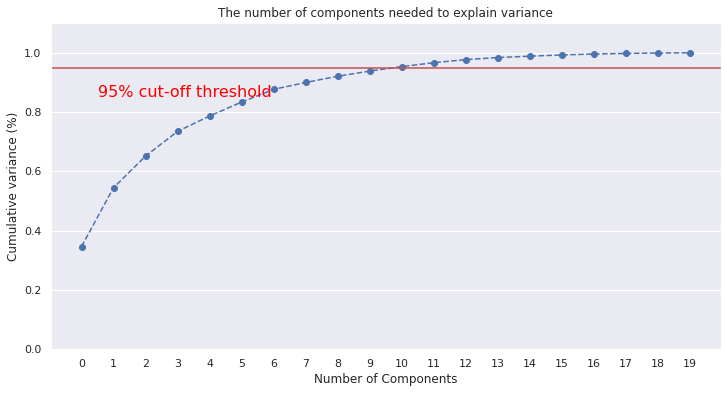

In [73]:
pca = PCA().fit(X_train_sc)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, len(X_train_sc.columns), step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(X_train_sc.columns), step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [74]:
PCA_train = PCA(n_components=10).fit_transform(X_train_sc)

In [75]:
PCA_test = PCA(n_components=10).fit_transform(X_test_sc)

In [76]:
PCA_train.shape

(2713, 10)

In [77]:
PCA_test

array([[ 0.67501619, -1.10742315,  0.35403132, ..., -0.41433464,
         0.90116213,  0.15357598],
       [ 0.01025543, -0.28020027,  1.25630837, ..., -0.05452665,
         0.35408172,  0.09091583],
       [ 0.66890509, -1.07010727,  2.54542426, ...,  0.00289151,
         0.37327044, -0.03242567],
       ...,
       [ 1.8044409 , -0.48220532,  0.14360858, ..., -0.36782577,
        -0.0542718 , -0.06297305],
       [ 0.71943272, -0.1881641 ,  1.646633  , ...,  0.16563278,
         0.32677189,  0.3476012 ],
       [-0.79519191, -0.0344628 ,  0.91844318, ...,  0.18497416,
        -0.27560532, -0.01172146]])

In [78]:
# Convert back arrays of train and test into dataframe format

PCA_train_df = pd.DataFrame(PCA_train)
PCA_train_df.index = X_train_dum_num.index

PCA_test_df = pd.DataFrame(PCA_test)
PCA_test_df.index = X_test_dum_num.index

In [79]:
PCA_train_df

,0,1,2,3,4,5,6,7,8,9
3151,4.125805,-0.209811,-1.220917,-3.461160,1.040038,-1.425961,1.812496,-0.069288,-0.202049,-0.372729
1698,4.792378,0.144769,-2.593713,-2.275660,0.216921,-0.037761,0.078565,0.327886,0.529295,-1.393367
2327,-0.146240,-0.602791,-1.805141,0.067102,-1.179556,0.228453,0.073477,0.013256,-0.292911,0.381442
721,-0.926914,-2.500700,-2.340041,0.121630,-0.638027,0.613513,0.520259,-0.336334,0.130207,-0.048492
811,1.859332,-0.418983,1.268899,-0.352896,-0.120241,-0.609857,-0.529903,0.473141,-0.093316,-0.075797
...,...,...,...,...,...,...,...,...,...,...
1403,6.114473,0.540169,1.471775,3.600318,-1.440297,0.029904,2.797325,-0.410907,-0.043799,-0.839903
2424,-1.174968,-0.357367,-0.745867,-0.839078,1.184220,0.676305,-1.152592,0.429858,-0.239329,-0.223608
2788,1.477454,-0.773012,2.504890,-1.246310,0.064683,-1.129188,0.737258,0.086252,0.179741,0.893245
1813,-0.062174,0.197508,-0.917371,0.161527,-0.155322,-1.445399,-1.391214,-0.677607,-0.429636,0.089368


In [80]:
PCA_test_df

,0,1,2,3,4,5,6,7,8,9
1024,0.675016,-1.107423,0.354031,-0.876962,0.614760,-1.447327,0.460018,-0.414335,0.901162,0.153576
3531,0.010255,-0.280200,1.256308,0.162575,-0.750472,0.385971,-0.372320,-0.054527,0.354082,0.090916
1992,0.668905,-1.070107,2.545424,-1.003914,-0.356466,-0.762894,-0.044314,0.002892,0.373270,-0.032426
1875,-0.281572,1.079452,0.561799,0.689848,-0.945876,0.237052,0.047252,-0.869260,-0.305527,0.193167
243,0.726656,1.821098,2.890143,-1.544545,1.334377,0.131314,-0.522279,0.031939,0.528628,0.536990
...,...,...,...,...,...,...,...,...,...,...
1709,-1.369483,-1.321238,1.823206,-0.121175,-0.008625,-0.141183,-0.125386,0.340324,0.494764,-0.404024
3413,-4.584975,1.485109,-0.350889,-1.230332,0.193537,0.452708,-0.362336,0.421724,-1.070798,-0.054325
1407,1.804441,-0.482205,0.143609,0.557161,0.904828,0.850013,-0.851879,-0.367826,-0.054272,-0.062973
3336,0.719433,-0.188164,1.646633,0.092064,-1.278328,-0.844281,0.497735,0.165633,0.326772,0.347601


In [81]:
# The finalized train test split dataframes after PCA transformation, scaling and dummies

X_train = pd.concat([PCA_train_df, X_train_dum_cat],axis=1)
X_test = pd.concat([PCA_test_df, X_test_dum_cat],axis=1)

In [82]:
X_train.sort_index()

,0,1,2,3,4,5,6,7,8,9,Total_pur,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Gender_U,Cust_Prop_U
0,1.931618,-0.634098,0.031807,-3.060893,-0.036551,-0.671101,1.267882,-0.966226,-1.287168,0.710892,22.50,0,0,0,0,0,0,0,0,0
2,1.248095,0.559882,-1.065837,0.735508,1.756195,-0.452506,-1.344371,-0.397018,-0.284932,0.365771,45.00,0,0,0,0,1,1,0,0,1
3,1.416058,1.164766,0.659998,-3.832686,-0.316865,-1.054950,1.096346,1.173981,0.874380,0.308762,60.00,0,0,0,0,0,0,0,0,1
4,1.087667,-2.025894,0.736360,-1.037354,-2.180676,-1.752342,0.576446,0.382713,0.013091,0.039301,12.99,0,0,0,0,1,1,0,0,0
5,2.849256,-1.046836,0.427890,-0.055914,-0.680469,-0.759007,-0.169458,0.819508,0.438704,-0.258253,23.25,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,-1.370332,-0.186873,-1.389627,-0.169767,0.513128,-0.383551,-0.482690,-0.309745,-0.317373,0.331493,36.00,0,0,0,0,0,0,1,0,1
3610,0.806244,-1.130331,1.498523,-0.979153,-1.239352,0.220595,0.242277,0.989791,0.031271,0.351691,27.00,0,0,0,0,1,1,1,0,1
3613,-1.587264,0.505531,0.031218,-1.276290,-2.134808,0.808202,0.499309,-0.603666,0.317287,0.720302,49.50,0,0,0,0,0,0,0,0,0
3614,5.276114,0.547383,1.335032,2.029283,-0.630653,-1.849188,1.024068,-0.216511,-0.040703,-0.176648,38.13,0,0,0,0,1,1,0,0,0


In [83]:
X_test.sort_index()

,0,1,2,3,4,5,6,7,8,9,Total_pur,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Gender_U,Cust_Prop_U
1,-1.399162,1.412578,-0.615734,1.007321,-0.026663,4.174147,-0.347027,0.098934,0.607191,-0.234478,75.00,0,0,0,0,0,1,1,0,1
6,1.479695,1.347521,-0.835360,-1.018436,-1.199616,-1.431022,-1.131051,0.066796,-0.364942,-0.122012,54.00,0,0,0,0,0,1,1,0,0
10,-1.926862,-0.307415,0.265255,0.956087,-0.229829,-1.038716,-0.224601,0.642628,1.153744,-0.422745,38.01,0,0,0,0,1,1,1,0,0
15,0.718437,-1.150542,-2.981531,-0.200614,-1.684229,2.565913,2.770524,-1.015656,-0.431379,0.344582,30.00,1,0,0,0,0,1,0,0,0
22,-0.143886,1.065979,-2.012284,1.735903,-0.990168,-0.149840,0.291819,0.079544,0.747539,-0.516988,60.00,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,3.445660,-0.469598,-0.833777,-1.944065,-0.164084,0.128205,0.555899,-0.472879,-0.424884,-0.070543,33.60,0,0,0,0,1,1,0,0,1
3611,0.193247,2.673028,-0.939156,0.982035,-1.377282,-1.320220,-0.260229,-0.914987,-0.693598,0.091288,75.00,0,0,0,0,0,1,0,0,0
3612,-1.698749,1.034233,-0.160355,-0.196135,-2.287988,0.065002,-0.434075,0.076863,-0.208867,-0.088400,54.00,0,0,0,0,0,0,0,0,0
3616,0.163910,1.575677,-1.729694,0.200775,-1.439521,-1.224319,-0.956517,0.186341,-0.839084,-0.512009,60.00,0,0,0,0,0,1,1,0,0


# 7. Objective 1: Machine Learning
    
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`. 

    **Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.


Apply various ML algorithms on the data, evaluate them after Grid Search and Cross Validation, and choose the best model.

In [84]:
# Logistic Regression

logr_param_grid = {'C': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],
                   'penalty' : ['l1', 'l2'],
                   'fit_intercept': [True, False]}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                        logr_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)

logr_grid.fit(X_train, y_train)

print('LogisticRegression Best parameters', logr_grid.best_params_)
logr_model = logr_grid.best_estimator_
print('LogisticRegression best score = ',logr_grid.best_score_ )

logr_pred = logr_model.predict(X_test)
print('Logistic Regression best model confusion matrix on test data  \n',confusion_matrix(y_test, logr_pred)  )
print('*********************************************')
print('Logistic Regression best model Precision  on test data = {:.2f}'.format(precision_score(y_test, logr_pred)))
print('Logistic Regression best model Recall on test data = {:.2f}'.format(recall_score(y_test, logr_pred)))
print('Logistic Regression best model F1 on test data  = {:.2f}'.format(f1_score(y_test, logr_pred)))
print('Logistic Regression best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, logr_pred)))
print('*********************************************')

LogisticRegression Best parameters {'C': 0.001, 'fit_intercept': False, 'penalty': 'l2'}
LogisticRegression best score =  0.592731656391713
Logistic Regression best model confusion matrix on test data  
 [[328 143]
 [256 178]]
*********************************************
Logistic Regression best model Precision  on test data = 0.55
Logistic Regression best model Recall on test data = 0.41
Logistic Regression best model F1 on test data  = 0.47
Logistic Regression best model Accuracy  on test data = 0.56
*********************************************


In [85]:
# Decision Tree

dt_param_grid = {'max_depth': np.arange(1, 10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                        dt_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
dt_grid.fit(X_train, y_train)

print('Decision Tree Best parameters', dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
print('Decision Tree best score = ',dt_grid.best_score_ )
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print('Decision Tree best model confusion matrix on test data  \n',confusion_matrix(y_test, dt_pred)  )
print('*********************************************')
print('Decision Tree best model Precision  on test data = {:.2f}'.format(precision_score(y_test, dt_pred)))
print('Decision Tree best model Recall on test data = {:.2f}'.format(recall_score(y_test, dt_pred)))
print('Decision Tree best model F1 on test data  = {:.2f}'.format(f1_score(y_test, dt_pred)))
print('Decision Tree best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, dt_pred)))
print('*********************************************')

Decision Tree Best parameters {'max_depth': 1}
Decision Tree best score =  0.5559933694647186
Decision Tree best model confusion matrix on test data  
 [[324 147]
 [237 197]]
*********************************************
Decision Tree best model Precision  on test data = 0.57
Decision Tree best model Recall on test data = 0.45
Decision Tree best model F1 on test data  = 0.51
Decision Tree best model Accuracy  on test data = 0.58
*********************************************


In [86]:
# K-Nearest Neighbors

knn_param_grid = {'n_neighbors': np.arange(1, 30),
                  'p': [1,2],
                 'weights':['uniform','distance']}
                   

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                        knn_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
knn_grid.fit(X_train, y_train)
print('Knn Best parameters', knn_grid.best_params_)
knn_model = knn_grid.best_estimator_

knn_model.fit(X_train, y_train)
print('Knn best score = ',knn_grid.best_score_ )

knn_pred = knn_model.predict(X_test)
print('Knn best model confusion matrix on test data  \n',confusion_matrix(y_test, knn_pred)  )
print('*********************************************')
print('Knn best model Precision  on test data = {:.2f}'.format(precision_score(y_test, knn_pred)))
print('Knn best model Recall  on test data = {:.2f}'.format(recall_score(y_test, knn_pred)))
print('Knn best model F1 on test data = {:.2f}'.format(f1_score(y_test, knn_pred)))
print('Knn best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, knn_pred)))
print('*********************************************')

Knn Best parameters {'n_neighbors': 24, 'p': 1, 'weights': 'distance'}
Knn best score =  0.5610882365642962
Knn best model confusion matrix on test data  
 [[298 173]
 [225 209]]
*********************************************
Knn best model Precision  on test data = 0.55
Knn best model Recall  on test data = 0.48
Knn best model F1 on test data = 0.51
Knn best model Accuracy  on test data = 0.56
*********************************************


In [87]:
#Not enough time to run
# Support Vector Machine

#svc_param_grid = {'C': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],
                 # 'kernel' : ['linear', 'rbf'],
                  #'gamma': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100]}

#svc_grid = GridSearchCV(SVC(), 
                       # svc_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
#svc_grid.fit(X_train,y_train)
#print('LogisticRegression Best parameters', svc_grid.best_params_)
#svc_model = svc_grid.best_estimator_
#print('LogisticRegression best score = ',svc_grid.best_score_ )

#svc_pred = svc_model.predict(X_test)
#print('SVC best model confusion matrix on test data  \n',confusion_matrix(y_test, svc_pred)  )
#print('*********************************************')
#print('SVC best model Precision  on test data = {:.2f}'.format(precision_score(y_test, svc_pred)))
#print('SVC best model Recall on test data = {:.2f}'.format(recall_score(y_test, svc_pred)))
#print('SVC best model F1 on test data  = {:.2f}'.format(f1_score(y_test, svc_pred)))
#print('SVC best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, svc_pred)))
#print('*********************************************')

# 8. Objective 2

**2. Calculate the value and the revenue of your model.** Fit your model on train set. Assume amonge the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

In [88]:
# Logistic Regression Best Model

model_best = logr_model.predict(X_test_sc)
a = confusion_matrix(y_test, model_best)

print(a)
print(a[0][0])

# Confusion Matrix
advertisement_cost=5 # given
num_pred_pos= a[0][0] + a[0][1] # TP +FP
num_pred_neg_pos= a[0][1] # FP
num_pred_pos_pos=  a[0][0] # TP



avg_pur = data[(data.index.isin(X_train.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()
print("Average Purchase: ",avg_pur)



cost = advertisement_cost*num_pred_pos
lost = avg_pur*num_pred_neg_pos
gain = avg_pur*num_pred_pos_pos
value = gain - lost - cost
revenue = gain - cost


print('Cost :$ ',cost)
print('Lost :$ ',lost)
print('Gain : $',gain)
print('Value : $',value)
print('Revenue : $ ',revenue)


[[203 268]
 [250 184]]
203
Average Purchase:  14.694508448540706
Cost :$  2355
Lost :$  3938.128264208909
Gain : $ 2982.985215053763
Value : $ -3310.143049155146
Revenue : $  627.9852150537631


In [89]:
# Decision Tree Best Model

model_best = dt_model.predict(X_test_sc)
a = confusion_matrix(y_test, model_best)

print(a)
print(a[0][0])

# Confusion Matrix
advertisement_cost=5 # given
num_pred_pos= a[0][0] + a[0][1] # TP +FP
num_pred_neg_pos= a[0][1] # FP
num_pred_pos_pos=  a[0][0] # TP



avg_pur = data[(data.index.isin(X_train.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()
print("Average Purchase: ",avg_pur)



cost = advertisement_cost*num_pred_pos
lost = avg_pur*num_pred_neg_pos
gain = avg_pur*num_pred_pos_pos
value = gain - lost - cost
revenue = gain - cost


print('Cost :$ ',cost)
print('Lost :$ ',lost)
print('Gain : $',gain)
print('Value : $',value)
print('Revenue : $ ',revenue)


[[  0 471]
 [  0 434]]
0
Average Purchase:  14.694508448540706
Cost :$  2355
Lost :$  6921.113479262673
Gain : $ 0.0
Value : $ -9276.113479262673
Revenue : $  -2355.0


In [90]:
# Knn Best Model

model_best = knn_model.predict(X_test_sc)
a = confusion_matrix(y_test, model_best)

print(a)
print(a[0][0])

# Confusion Matrix
advertisement_cost=5 # given
num_pred_pos= a[0][0] + a[0][1] # TN +FP
num_pred_neg_pos= a[0][1] # FP
num_pred_pos_pos=  a[0][0] # TP



avg_pur = data[(data.index.isin(X_train.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()
print("Average Purchase: ",avg_pur)



cost = advertisement_cost*num_pred_pos
lost = avg_pur*num_pred_neg_pos
gain = avg_pur*num_pred_pos_pos
value = gain - lost - cost
revenue = gain - cost


print('Cost :$ ',cost)
print('Lost :$ ',lost)
print('Gain : $',gain)
print('Value : $',value)
print('Revenue : $ ',revenue)


[[469   2]
 [432   2]]
469
Average Purchase:  14.694508448540706
Cost :$  2355
Lost :$  29.38901689708141
Gain : $ 6891.724462365591
Value : $ 4507.3354454685095
Revenue : $  4536.724462365591


# 9. Objective 3
    
**3. Compare your best models' revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost



In [91]:
#Default solution
advertisement_cost =5
data_size_Xtest = len(X_test_sc)

cost = advertisement_cost*data_size_Xtest
gain = data[(data.index.isin(X_test.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].sum()
revenue = gain - cost

print('Cost :$ ',cost)
print('Gain : $',gain)
print('Revenue : $ ',revenue)


Cost :$  4525
Gain : $ 6140.0
Revenue : $  1615.0


Insight

We choose KNN Best Model as the difference between the default result and model's result is acceptable, not too much difference compare to the the other models.


# 10. Objective 4
    
**4. Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10\%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    - calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    - calculate the revenue of the default model: send advertisement to everyone
         - cost = advertisement_cost * size of the test set
         - gain = average_purchase * purchase_rate
         - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

In [92]:
# all 30k
cost = advertisement_cost*30000
gain = avg_pur*num_pred_neg_pos
revenue = gain - cost


print('Cost :$ ',cost)
print('Lost :$ ',lost)
print('Gain : $',gain)
print('Value : $',value)
print('Revenue : $ ',revenue)


Cost :$  150000
Lost :$  29.38901689708141
Gain : $ 29.38901689708141
Value : $ 4507.3354454685095
Revenue : $  -149970.61098310293


In [93]:
# Based on KNN model

advertisement_cost =5
pr = 10
N = 30000
data_size_test = 30000 

pres = 0.55 
rec = 0.48
TP_FN = 3000



TP = rec*(TP_FN)
FN = (TP - rec*TP)/rec
FP = (TP-pres*TP)/pres
TN = 30000 -TP-FP-FN 

advertisement_cost=5 # given
num_pred_pos= TP+FP # test set
num_pred_neg_pos= FN #test set
num_pred_pos_pos=  TP #test set
average_purchase =  data[(data.index.isin(X_train.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()



cost = advertisement_cost*num_pred_pos
gain = average_purchase*num_pred_pos_pos
revenue = gain - cost


print('Cost :$ ',cost)
print('Gain : $',gain)
print('Revenue : $ ',revenue)


Cost :$  13090.90909090909
Gain : $ 21160.092165898615
Revenue : $  8069.183074989525


In [94]:
# Based on the Decision Tree Model

advertisement_cost =5
pr = 10
N = 30000
data_size_test = 30000 

pres = 0.57 
rec = 0.45
TP_FN = 3000


TP = rec*(TP_FN)
FN = (TP - rec*TP)/rec
FP = (TP-pres*TP)/pres
TN = 30000 -TP-FP-FN 

advertisement_cost=5 # given
num_pred_pos= TP+FP # test set
num_pred_neg_pos= FN #test set
num_pred_pos_pos=  TP #test set
average_purchase = data[(data.index.isin(X_train.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()




cost = advertisement_cost*num_pred_pos
gain = average_purchase*num_pred_pos_pos
revenue = gain - cost


print('Cost :$ ',cost)
print('Gain : $',gain)
print('Revenue : $ ',revenue)


Cost :$  11842.105263157897
Gain : $ 19837.586405529953
Revenue : $  7995.481142372057
